# Analysis of Movie Data
### Xinlu Shen, Yifan Qin, Qianyin Huang

---
## To Do List (Table of Contents):
### 1. Introduction
### 2. Getting Started
* 2.1 Required Libraries
* 2.2 Load Data

### 3. Data Cleaning
* 3.1 Remove NaN
* 3.2 Remove the Unwanted Columns
* 3.3 Organize the Dataset

### 4. Data Exploration and Visualization
* 4.1 Top 15 Movies Based on Gross and IMDB Score
  * 4.1.1 Gross vs Budget
  * 4.1.2 Gross vs IMDB Score
* 4.2 Violin Plot (Gross/Score V.S Year)
* 4.3 Genre

### 5. Conclusion

---
## 1. Introduction
What would be considered a **successful movie**? A high IMDB score? A high gross? <p/>
Often only one of these two criterias can be satisfied, and many factors are taken into account to determine a movie's IMDB score or gross. Such factors can include genres, popularity of director and actors, etc. <p/>
This tutorial is going to explore how the factors contribute to the IMDB score or gross of a movie, and then make a comparison between IMDB score and gross with respect to the way that they are influenced by these factors.

---
## 2. Getting Started
### 2.1 Libraries
We used python3 with the following libraries:
- Pandas: a tool for data structures and data analysis
- Numpy: used for scientific computing, such as linear algebra and random number capabilities
- Seaborn: a data visualization library for making statistical graphics
- Scikit-learn: a useful library for machine learning and data mining.
- Math: used for some common math functions and constants
- Matplotlib: a library for plotting histograms, scatterplots, power spectra, etc
- Statsmodels: used to calculate statistical models and conducte statistical tests

In [350]:
import pandas as pd
import numpy as np
import seaborn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.cm as cm
import matplotlib.colors as colors
warnings.filterwarnings('ignore')

### 2.2 Load Data
Load the csv file into a **DataFrame** and use DataFrame.head() to look at the first 5 rows.<br/>

(Original csv file found from kaggle.com)

In [351]:
url = "https://raw.githubusercontent.com/mookee233/final_tutorial/master/movie_metadata.csv"
data = pd.read_csv(url)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In our dataset, there are 28 columns:<br/>
- Color (Color or 'Black and White')
- Director_name
- Num_critic_for_reviews (Number of critical reviews on Imdb)
- Duration
- Director_facebook_likes
- Actor_3_facebook_likes
- Actor_2_name
- Actor_1_facebook_likes
- Gross
- Genres
- Actor_1_name
- Movie_title
- Num_voted_users (Number of users who voted)
- Cast_total_facebook_likes (Sum of facebook likes of the whole cast)
- Actor_3_name
- Facenumber_in_poster
- Plot_keywords
- Movie_imdb_link
- Num_user_for_reviews
- Language
- Country
- Content_rating
- Budget
- Title_year (The relaese year of the movie)
- Actor_2_facebook_likes
- Imdb_score
- Aspect_ratio
- Movie_facebook_likes


**DataFrame.describe()** method gives some basic statistics about columns with quantitative values so that we can get some intuition.

In [352]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


---
## 3. Data Cleaning

### 3.1 Remove the Unwanted Columns
By accessing DataFrame.columns of the dataframe, we can get all columns, and that is all categories of information that we can explore on. <p/>
Then we can drop columns that are not needed in our later exploration.

In [353]:
print(data.columns)
movies = data.drop(['color', 'duration', 'movie_imdb_link','director_name', 'actor_1_name', \
    'actor_2_name', 'actor_3_name', 'aspect_ratio', 'facenumber_in_poster', "content_rating"], axis=1)
movies

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,Signed Sealed Delivered,629,2283,fraud|postal worker|prison|theft|trial,6.0,English,Canada,NaN,2013.0,470.0,7.7,84
5039,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,The Following,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,English,USA,NaN,NaN,593.0,7.5,32000
5040,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,A Plague So Pleasant,38,0,NaN,3.0,English,USA,1400.0,2013.0,0.0,6.3,16
5041,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,Shanghai Calling,1255,2386,NaN,9.0,English,USA,NaN,2012.0,719.0,6.3,660


### 3.2 Remove NaN

In [354]:
for index, row in movies.iterrows():
  if pd.isnull(row["gross"]) == True or pd.isnull(row["title_year"]) == True or pd.isnull(row['budget']) == True or row["title_year"] < 2000:
    movies.drop(index, inplace=True)

movies.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1873,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000


### 3.3 Organize the Dataset

In [355]:
movies = movies[['movie_title','genres','title_year','imdb_score', 'num_voted_users', 'movie_facebook_likes', 
                 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes',
                'cast_total_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews','budget', 'gross',
                'language', 'country','plot_keywords',]]
movies.head()

,movie_title,genres,title_year,imdb_score,num_voted_users,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_user_for_reviews,budget,gross,language,country,plot_keywords
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,7.9,886204,33000,0.0,1000.0,936.0,855.0,4834,723.0,3054.0,237000000.0,760505847.0,English,USA,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007.0,7.1,471220,0,563.0,40000.0,5000.0,1000.0,48350,302.0,1238.0,300000000.0,309404152.0,English,USA,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,Action|Adventure|Thriller,2015.0,6.8,275868,85000,0.0,11000.0,393.0,161.0,11700,602.0,994.0,245000000.0,200074175.0,English,UK,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,Action|Thriller,2012.0,8.5,1144337,164000,22000.0,27000.0,23000.0,23000.0,106759,813.0,2701.0,250000000.0,448130642.0,English,USA,deception|imprisonment|lawlessness|police offi...
5,John Carter,Action|Adventure|Sci-Fi,2012.0,6.6,212204,24000,475.0,640.0,632.0,530.0,1873,462.0,738.0,263700000.0,73058679.0,English,USA,alien|american civil war|male nipple|mars|prin...


---
## 4. Data Exploration and Visualization

### 4.1 Explore the relationship between budget, rating and gross

#### 4.1.1 Gross vs Budget

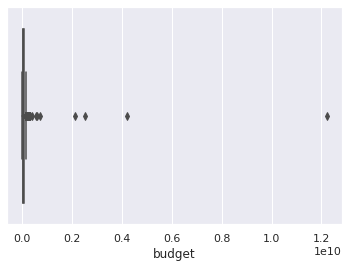

In [356]:
seaborn.boxplot(x=movies['budget'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


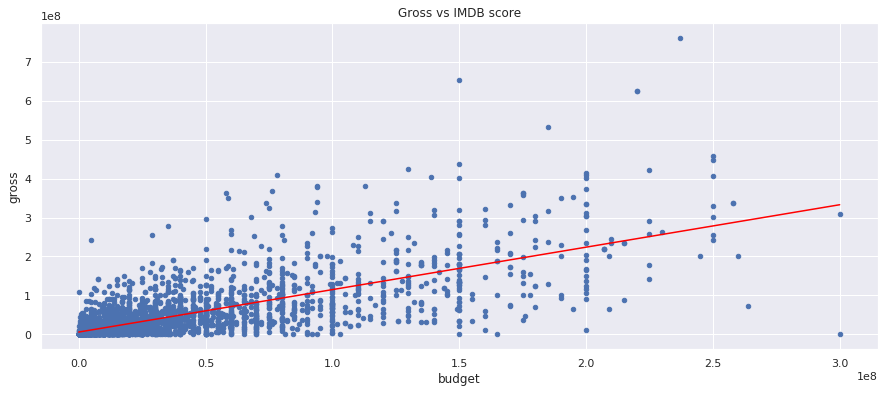

In [357]:
movies1 = movies[movies["budget"]<300000000]
grossbudplot = movies2[['gross', 'budget']]
grossbudplot.plot(kind = 'scatter', y = 'gross', x = 'budget',figsize = (15,6), title = "Gross vs IMDB score" )
model1 = LinearRegression()
model1.fit(movies2[['budget']],movies2['gross'])
a1 = np.linspace(min(movies2['budget']),max(movies2['budget']),100)
a2 = model1.coef_*a1 + model1.intercept_
plt.plot(a1, a2, color='red')
plt.show()

#### 4.1.2 Gross vs IMDB Score

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


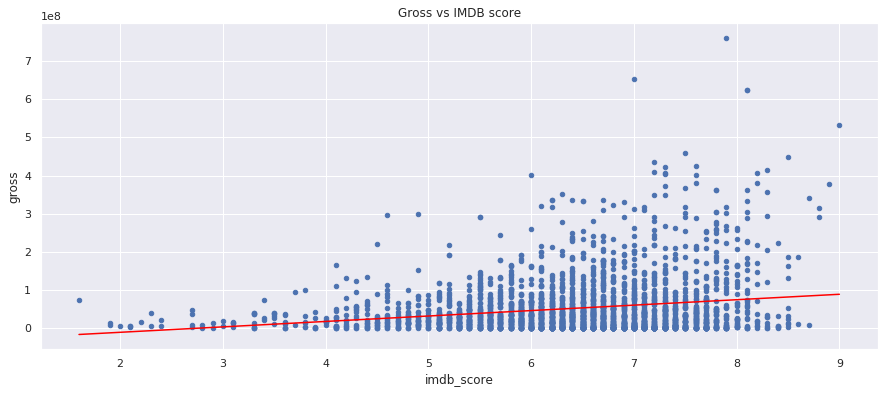

In [358]:
grossIMDBplot = movies[['gross', 'imdb_score']]
grossIMDBplot.plot(kind = 'scatter', y = 'gross', x = 'imdb_score',figsize = (15,6), title = "Gross vs IMDB score" )
model = LinearRegression()
model.fit(movies[['imdb_score']],movies['gross'])
aa1 = np.linspace(min(movies['imdb_score']),max(movies['imdb_score']),100)
aa2 = model.coef_*aa1 + model.intercept_
plt.plot(aa1, aa2, color='red')
plt.show()

From the plot we get, we can see there is no necessary relationship between IMDB score and budget. However, we can tell that movies with low score are likely to have a low gross. The scores of high-gross movies are generally range from 6 to 9.

### 4.2 Top 15 Movies Based on Gross and IMDB Score
We might be interested about which movies have the highest gross, so here it is! <p/>
A simple visualization of movies with **top 15 gross** is shown below. To do this, we need to sort the dataframe with respect to their gross in descending order, and then retrieve the first 20 rows from resulting dataframe. <p/>
seaborn.barplot enables us to plot the given data nicely.

Text(0.5, 1.0, 'Top 15 Movies with Highest Gross')

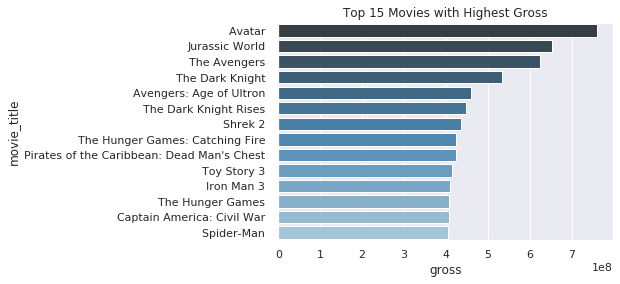

In [359]:
sort_by_gross = movies.sort_values(by=['gross'], ascending=False)
top15 = sort_by_gross.iloc[0:15, :]
top15_plt = seaborn.barplot(y=top15['movie_title'], x=top15['gross'], palette="Blues_d")
top15_plt.set_title("Top 15 Movies with Highest Gross")

If we are only interested in the new ones, we can also filter out old movies and leave the ones with title year from 2015.

Text(0.5, 1.0, 'Top 15 Movies with Highest Gross from 2014')

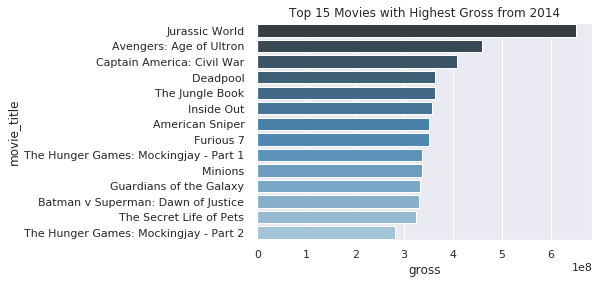

In [360]:
recent_5_years = movies[movies['title_year']>=2014]
sort_by_gross_recent = recent_5_years.sort_values(by=['gross'], ascending=False)
top15_recent = sort_by_gross_recent.iloc[0:15, :]

top15_recent_plt = seaborn.barplot(y=top15_recent['movie_title'], x=top15_recent['gross'], palette="Blues_d")
top15_recent_plt.set_title("Top 15 Movies with Highest Gross from 2014")

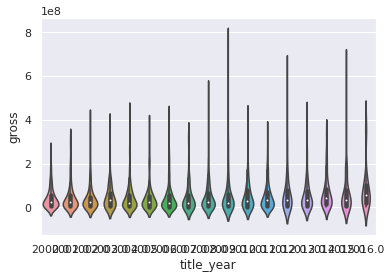

In [361]:
seaborn.violinplot(y=movies['gross'], x=movies['title_year'])

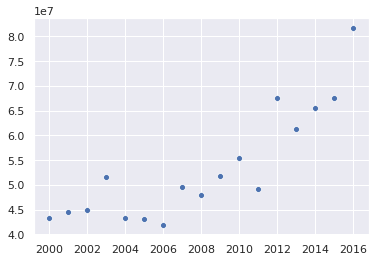

In [362]:
gross_list = []
years = []
for year, j in movies.groupby(['title_year']):
    years.append(year)
    gross_list.append(np.mean(j['gross']))
seaborn.scatterplot(x=years, y=gross_list)

In [363]:
movies.columns

Index(['movie_title', 'genres', 'title_year', 'imdb_score', 'num_voted_users',
       'movie_facebook_likes', 'director_facebook_likes',
       'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'num_critic_for_reviews', 'num_user_for_reviews', 'budget', 'gross',
       'language', 'country', 'plot_keywords'],
      dtype='object')

Violin Plot

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


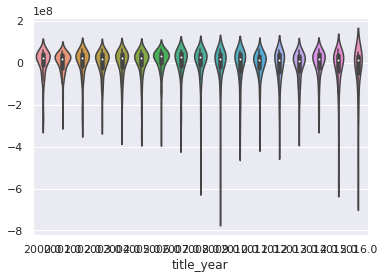

In [364]:
model = LinearRegression()
model.fit(movies[['title_year']], movies['gross'])
print(model)
residuals = np.array(model.predict(movies[['title_year']]))- np.array(list(movies['gross']))
seaborn.violinplot(movies['title_year'], residuals)
plt.show()

In [365]:
ActionMovie = movies[movies['genres'].str.match('Action')]
AdventureMovie = movies[movies['genres'].str.match('Adventure')]
AnimationMovie = movies[movies['genres'].str.match('Animation')]
RomanceMovie = movies[movies['genres'].str.match('Romance')]
FantasyMovie = movies[movies['genres'].str.match('Fantasy')]
SciFiMovie = movies[movies['genres'].str.match('Sci')]
SciFiMovie

,movie_title,genres,title_year,imdb_score,num_voted_users,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_user_for_reviews,budget,gross,language,country,plot_keywords
517,The Invasion,Sci-Fi|Thriller,2007.0,5.9,65037,0,101.0,1000.0,422.0,327.0,2323,232.0,273.0,80000000.0,15071514.0,English,USA,alien|epidemic|psychiatrist|space shuttle|virus
745,The Happening,Sci-Fi|Thriller,2008.0,5.0,163130,6000,0.0,11000.0,946.0,751.0,13654,323.0,1264.0,48000000.0,64505912.0,English,USA,bee|nature|park|school|teacher
2849,The Butterfly Effect,Sci-Fi|Thriller,2004.0,7.7,357579,15000,19.0,8000.0,902.0,829.0,12755,185.0,1100.0,13000000.0,23947.0,English,USA,blackout|child pornography|memory|surprise end...
2976,Project Almanac,Sci-Fi|Thriller,2015.0,6.4,57349,0,16.0,452.0,328.0,265.0,1819,177.0,177.0,12000000.0,22331028.0,English,USA,found footage|teenager|time machine|time trave...
4522,Beyond the Black Rainbow,Sci-Fi|Thriller,2010.0,6.1,6555,0,22.0,434.0,95.0,48.0,645,97.0,82.0,1100000.0,56129.0,English,Canada,exploitation|four word title|hallucinogen|lync...


### Distribution of Genres Over Years
Next we will take a look at how the genres were distributed in each year. More specifically, for each genre, we will calculate the number of movies that the genre is categorized into annually. To do this, we need to collect information from the dataframe and process it. <p/>

As the dataframe was displayed above, we can see that the 'genres' category contains a collection of genres for each movie, so it's time to split them! In the meantime, we can add them to a set of genres, which is useful for later analysis.

In [366]:
genres = []
genre_set = set()

for g in movies['genres']:
  splitted = g.split('|')
  genres.append(splitted)
  for i in splitted:
    genre_set.add(i)

#movies['genres'] = genres
movies.loc[:, 'genres'] = genres
movies.head()

,movie_title,genres,title_year,imdb_score,num_voted_users,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_user_for_reviews,budget,gross,language,country,plot_keywords
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",2009.0,7.9,886204,33000,0.0,1000.0,936.0,855.0,4834,723.0,3054.0,237000000.0,760505847.0,English,USA,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",2007.0,7.1,471220,0,563.0,40000.0,5000.0,1000.0,48350,302.0,1238.0,300000000.0,309404152.0,English,USA,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,"[Action, Adventure, Thriller]",2015.0,6.8,275868,85000,0.0,11000.0,393.0,161.0,11700,602.0,994.0,245000000.0,200074175.0,English,UK,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,"[Action, Thriller]",2012.0,8.5,1144337,164000,22000.0,27000.0,23000.0,23000.0,106759,813.0,2701.0,250000000.0,448130642.0,English,USA,deception|imprisonment|lawlessness|police offi...
5,John Carter,"[Action, Adventure, Sci-Fi]",2012.0,6.6,212204,24000,475.0,640.0,632.0,530.0,1873,462.0,738.0,263700000.0,73058679.0,English,USA,alien|american civil war|male nipple|mars|prin...


After we have the 'genres' holding lists of genres, we can do some calculation. The for loop after initialization computes sums, and the next one makes a lineplot accordingly.

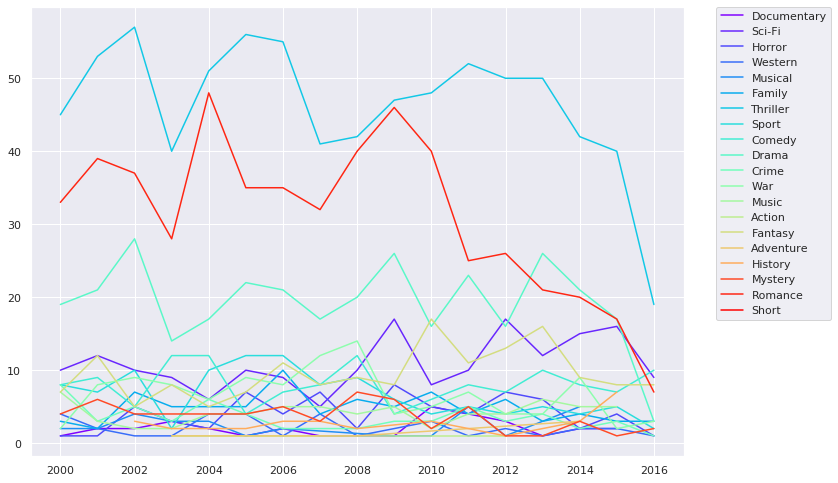

In [367]:
# initialization
genres_totalCount = dict()
genres_hash = dict()
years_total = dict()
for i in genre_set:
    genres_hash[i] = dict()
for i in movies['title_year'].unique():
    years_total[i] = 0

# sums up number of genre appearence each year
for i, j in movies.iterrows():
    for genre in j['genres']:
        if genre in genres_totalCount:
            genres_totalCount[genre] += 1
        else:
            genres_totalCount[genre] = 1
        years_total[j['title_year']] += 1
    if j['title_year'] in genres_hash[genre]:
        genres_hash[genre][j['title_year']] += 1
    else:
        genres_hash[genre][j['title_year']] = 1

cnt = 0
colors = cm.rainbow(np.linspace(0, 1, len(genre_set)))
for genre, years_cnt in genres_hash.items():
    years = list(years_cnt.keys())
    counts = list(years_cnt.values())

    seaborn.set(rc={'figure.figsize':(11.7,8.27)})
    ax = seaborn.lineplot(x=years, y=counts, label=genre, c=colors[cnt])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    cnt += 1

In [368]:
genres_totalCount

{'Action': 688,
 'Adventure': 574,
 'Fantasy': 374,
 'Sci-Fi': 347,
 'Thriller': 813,
 'Romance': 655,
 'Animation': 171,
 'Comedy': 1120,
 'Family': 359,
 'Musical': 60,
 'Mystery': 300,
 'Western': 34,
 'Drama': 1425,
 'History': 111,
 'Sport': 118,
 'Crime': 510,
 'Horror': 275,
 'War': 116,
 'Biography': 183,
 'Music': 116,
 'Documentary': 62,
 'Short': 1}

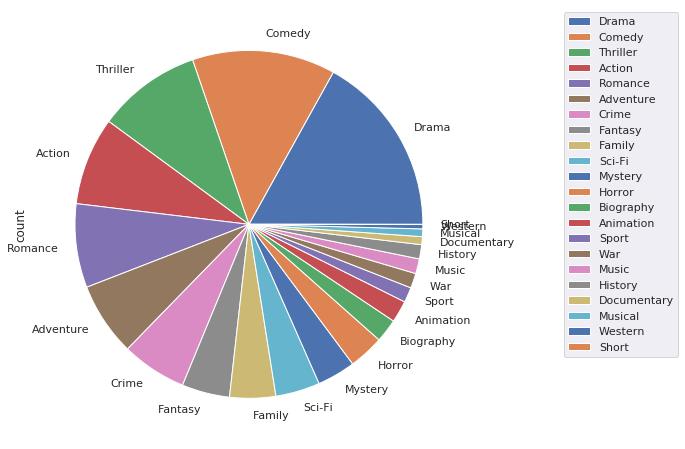

In [369]:
genres_col = []
count_col = []

for genre, count in genres_totalCount.items():
    genres_col.append(genre)
    count_col.append(count)

# Create a new DataFrame with index being genres and one column holding total counts
genres_ranking = pd.DataFrame({'count': count_col}, index=genres_col)

genres_ranking = genres_ranking.sort_values(by='count', ascending=False)
genres_ranking.plot.pie(y='count', figsize = (8,8)).legend(bbox_to_anchor=(1.5, 1))

It turns out that simply using the number of occurrence of the genres in all movies is not the best way to describe distribution over years since the number of movies each year recorded in the dataset varies. So intead, we will calculate the ratio that a specific genre appears in movies with respect to the number of movies recorded each year. 

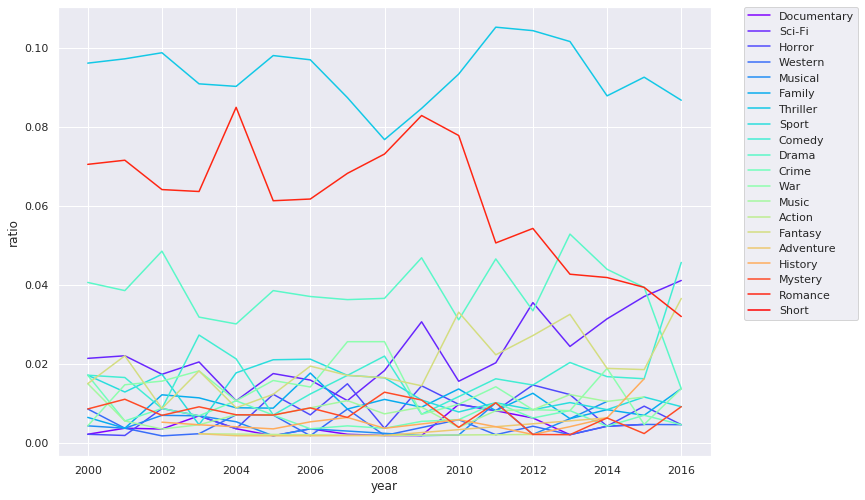

In [370]:
cnt = 0
for genre, years_cnt in genres_hash.items():
    years = list(years_cnt.keys())
    counts = list(years_cnt.values())
    ratio = []

    # Compute genres' ratio
    for i in range(len(years)):
        ratio.append(counts[i] / years_total[years[i]])

    seaborn.set(rc={'figure.figsize':(11.7,8.27)})
    ax = seaborn.lineplot(x=years, y=ratio, label=genre, c=colors[cnt])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='year', ylabel='ratio')
    cnt += 1


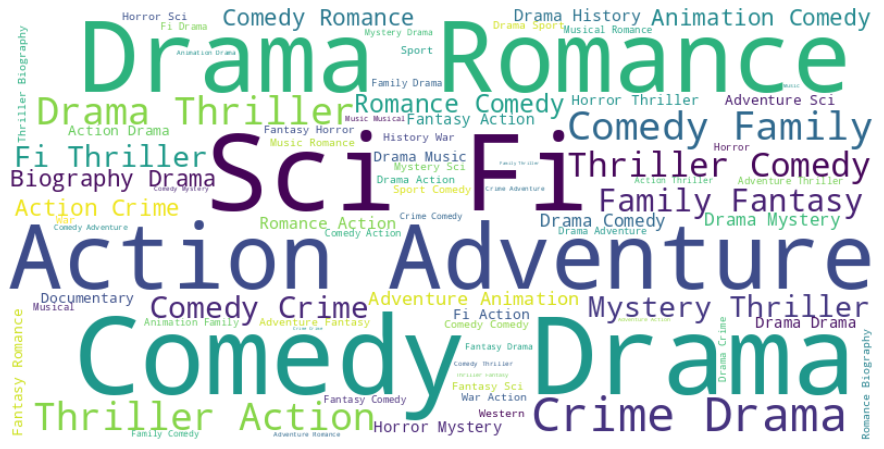

In [371]:
genres_all = []

# Collect all genre appearance into a single list
for i, j in movies.iterrows():
    genres_all.extend(j['genres'])

wc = WordCloud( width=800,
                height=400,
                background_color="white", 
                max_words=500,            
                max_font_size=100,        
                random_state=12,          
                ) 

# Join the strings with a space
lis = ' '.join(genres_all)

# Generate word cloud
wc.generate(lis)
  
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')

plt.axis("off") 
plt.show() 